# 6.4 Supervised Machine Learning: Regression

## Contents

1. Import libararies and data set
2. 

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Initiate matplotlib visuals
%matplotlib inline

In [4]:
# Create path variable
path = r'C:\Users\lisa_\Desktop\CareerFoundry\Exercises\Advanced Analytics & Dashboard Design'

In [5]:
#Import the King County data
df = pd.read_csv(os.path.join(path, 'kc_house_data_clean.csv'), index_col=False)

### 2. Data cleaning

In [7]:
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
#Drop Unnamed columns
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.shape

(21603, 19)

In [11]:
# Check for missing values
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
#Check for duplicates
dups = df.duplicated()
dups.shape

(21603,)

There are no missing values or duplicates

### 3. Data prep for regression analysis 

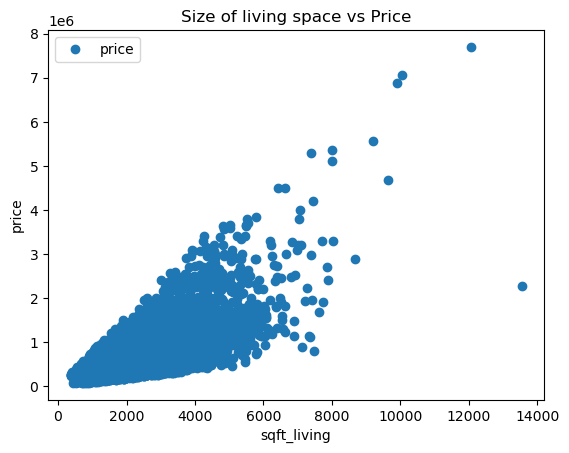

In [40]:
#Create a scatterplot using matplotlib for another look at how the sqft_living and price plot against each other.
df.plot(x = 'sqft_living', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Size of living space vs Price')  
plt.xlabel('sqft_living')  
plt.ylabel('price')  
plt.show()

In [41]:
#Reshape the variables into NumPy arrays and put them into separate objects.
X = df['sqft_living'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [42]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [43]:
y

array([[221900],
       [538000],
       [180000],
       ...,
       [402101],
       [400000],
       [325000]], dtype=int64)

In [44]:
#Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [24]:
#Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [25]:
#Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [46]:
#Predict the values of y using X.
y_predicted = regression.predict(X_test)

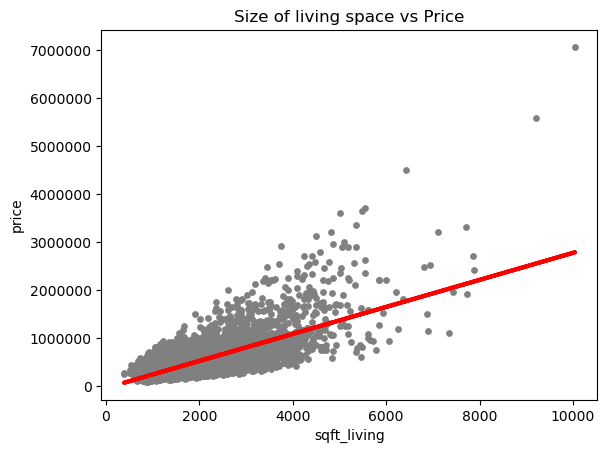

In [47]:
#Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Size of living space vs Price')
plot_test.xlabel('sqft_living')
plot_test.ylabel('price')
plt.ticklabel_format(style='plain', axis='y')
plot_test.show()

In [30]:
#Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[281.46425955]]
Mean squared error:  66560602311.65964
R2 score:  0.49206241169234366


In [32]:
y_predicted

array([[286784.5093098 ],
       [396555.57053394],
       [630170.90595966],
       ...,
       [666761.25970104],
       [765273.75054321],
       [979186.58780049]])

In [33]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,390000,2.867845e+05
1,265000,3.965556e+05
2,839000,6.301709e+05
3,405000,3.571506e+05
4,422250,3.149309e+05
5,349900,5.322213e+05
6,295000,3.768531e+05
7,348000,1.432377e+05
8,217500,2.473795e+05
9,340000,9.116352e+05


##### Compare how the regression fits the training set

In [35]:
#Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [36]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [37]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[281.46425955]]
Mean squared error:  69142572635.15787
R2 score:  0.4929219909142267


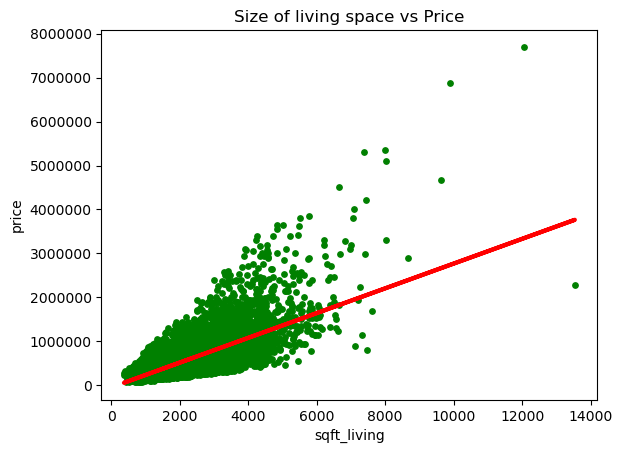

In [48]:
#Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Size of living space vs Price')
plot_test.xlabel('sqft_living')
plot_test.ylabel('price')
plt.ticklabel_format(style='plain', axis='y')
plot_test.show()

### 5. Results

The model is not performing too well with the R2 score at .49. Comparing the actual and predicted values of y, it shows that the relationship does not follow a single, straight regression line which means we can't really use this to predict anything. This rules out our hypothesis. While square footage is an important factor in determining the prices of homes in King County, it is not the only factor.

#### Hypothesis: The bigger the living area square footage, the higher the price.